In [17]:

# Location-Based Recommendations involve providing personalized suggestions to users based on their current or 
# past locations. This type of recommendation system takes advantage of the user's geographical information, such 
# as latitude and longitude coordinates, to deliver recommendations tailored to their physical surroundings. 


In [18]:

import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree

# Set seed for reproducibility
np.random.seed(42)

# Generate random spatial data for points of interest (POIs)
num_pois = 50
poi_latitude = np.random.uniform(low=35.0, high=40.0, size=num_pois)
poi_longitude = np.random.uniform(low=-120.0, high=-80.0, size=num_pois)
poi_names = ['McDonald\'s', 'Starbucks', 'Burger King', 'Dunkin\' Donuts', 
             'Family Groceries', 'Dollar Store', 'Chipotle', 'Chick-fil-A', 'Taco Bell']

# Ensure consistent lengths of latitude, longitude, and names
poi_latitude = poi_latitude[:len(poi_names)]
poi_longitude = poi_longitude[:len(poi_names)]

# Create a DataFrame for points of interest (POIs)
poi_df = pd.DataFrame({
    'POI_Name': poi_names,
    'Latitude': poi_latitude,
    'Longitude': poi_longitude
})

# Display the POI DataFrame
print("Points of Interest (POIs):")
print(poi_df.head())


Points of Interest (POIs):
           POI_Name   Latitude  Longitude
0        McDonald's  36.872701 -81.216615
1         Starbucks  39.753572 -88.994687
2       Burger King  38.659970 -82.420042
3    Dunkin' Donuts  37.993292 -84.206906
4  Family Groceries  35.780093 -96.084001


In [19]:

# Generate random spatial data for users
num_users = 5
user_latitude = np.random.uniform(low=35.0, high=40.0, size=num_users)
user_longitude = np.random.uniform(low=-120.0, high=-80.0, size=num_users)
user_names = [f"User_{i}" for i in range(1, num_users + 1)]

# Create a DataFrame for users
user_df = pd.DataFrame({
    'User_Name': user_names,
    'Latitude': user_latitude,
    'Longitude': user_longitude
})

# Display the User DataFrame
print("\nUsers:")
print(user_df.head())



Users:
  User_Name   Latitude   Longitude
0    User_1  35.157146 -110.028311
1    User_2  38.182052 -103.584683
2    User_3  36.571780  -89.777954
3    User_4  37.542853 -110.848073
4    User_5  39.537832 -116.920804


In [20]:

# Build a BallTree for efficient nearest neighbor search
poi_coordinates = np.radians(poi_df[['Latitude', 'Longitude']].values)
ball_tree = BallTree(poi_coordinates, metric='haversine')

# Recommend points of interest (POIs) for each user based on their location
recommendations = []

for index, user_row in user_df.iterrows():
    # Ensure latitude and longitude are float values
    user_row['Latitude'] = float(user_row['Latitude'])
    user_row['Longitude'] = float(user_row['Longitude'])

    # Use scalar values instead of an array
    user_coordinates = np.radians([user_row['Latitude'], user_row['Longitude']])
    
    # Find the nearest POIs using the BallTree
    _, indices = ball_tree.query(user_coordinates.reshape(1, -1), k=3)
    
    # Get the recommended POIs for the user
    recommended_pois = poi_df.loc[indices[0], 'POI_Name'].tolist()
    
    recommendations.append({
        'User_Name': user_row['User_Name'],
        'Recommended_POIs': recommended_pois
    })

# Create a DataFrame for recommendations
recommendations_df = pd.DataFrame(recommendations)

# Display the recommendations
print("\nRecommendations:")
print(recommendations_df)



Recommendations:
  User_Name                               Recommended_POIs
0    User_1             [Chick-fil-A, Chipotle, Taco Bell]
1    User_2      [Family Groceries, Chick-fil-A, Chipotle]
2    User_3  [Starbucks, Dunkin' Donuts, Family Groceries]
3    User_4             [Chick-fil-A, Chipotle, Taco Bell]
4    User_5             [Taco Bell, Chick-fil-A, Chipotle]


In [21]:

import numpy as np
import pandas as pd
from sklearn.neighbors import BallTree
from geopy.geocoders import Nominatim

# Set seed for reproducibility
np.random.seed(42)

# Generate random spatial data for points of interest (POIs)
num_pois = 50
poi_latitude = np.random.uniform(low=35.0, high=40.0, size=num_pois)
poi_longitude = np.random.uniform(low=-120.0, high=-80.0, size=num_pois)
poi_names = ['McDonald\'s', 'Starbucks', 'Burger King', 'Dunkin\' Donuts', 
             'Family Groceries', 'Dollar Store', 'Chipotle', 'Chick-fil-A', 'Taco Bell']

# Ensure consistent lengths of latitude, longitude, and names
poi_latitude = poi_latitude[:len(poi_names)]
poi_longitude = poi_longitude[:len(poi_names)]

# Create a DataFrame for points of interest (POIs)
poi_df = pd.DataFrame({
    'POI_Name': poi_names,
    'Latitude': poi_latitude,
    'Longitude': poi_longitude
})

# Display the POI DataFrame
print("Points of Interest (POIs):")
print(poi_df.head())


Points of Interest (POIs):
           POI_Name   Latitude  Longitude
0        McDonald's  36.872701 -81.216615
1         Starbucks  39.753572 -88.994687
2       Burger King  38.659970 -82.420042
3    Dunkin' Donuts  37.993292 -84.206906
4  Family Groceries  35.780093 -96.084001


In [22]:

# Generate random spatial data for users
num_users = 5
user_latitude = np.random.uniform(low=35.0, high=40.0, size=num_users)
user_longitude = np.random.uniform(low=-120.0, high=-80.0, size=num_users)
user_names = [f"User_{i}" for i in range(1, num_users + 1)]

# Create a DataFrame for users
user_df = pd.DataFrame({
    'User_Name': user_names,
    'Latitude': user_latitude,
    'Longitude': user_longitude
})

# Display the User DataFrame
print("\nUsers:")
print(user_df.head())



Users:
  User_Name   Latitude   Longitude
0    User_1  35.157146 -110.028311
1    User_2  38.182052 -103.584683
2    User_3  36.571780  -89.777954
3    User_4  37.542853 -110.848073
4    User_5  39.537832 -116.920804


In [24]:

# Build a BallTree for efficient nearest neighbor search
poi_coordinates = np.radians(poi_df[['Latitude', 'Longitude']].values)
ball_tree = BallTree(poi_coordinates, metric='haversine')

# Reverse geocoding function
def reverse_geocode(latitude, longitude):
    geolocator = Nominatim(user_agent="geo_locator")
    location = geolocator.reverse((latitude, longitude), language="en")
    address = location.address
    return address

# Recommend points of interest (POIs) for each user based on their location
recommendations = []

for index, user_row in user_df.iterrows():
    # Ensure latitude and longitude are float values
    user_row['Latitude'] = float(user_row['Latitude'])
    user_row['Longitude'] = float(user_row['Longitude'])

    # Use scalar values instead of an array
    user_coordinates = np.radians([user_row['Latitude'], user_row['Longitude']])
    
    # Find the nearest POIs using the BallTree
    _, indices = ball_tree.query(user_coordinates.reshape(1, -1), k=3)
    
    # Get the recommended POIs for the user
    recommended_pois = poi_df.loc[indices[0], 'POI_Name'].tolist()

    # Reverse geocode user's location
    user_address = reverse_geocode(user_row['Latitude'], user_row['Longitude'])
    
    recommendations.append({
        'User_Name': user_row['User_Name'],
        'Recommended_POIs': recommended_pois,
        'User_Location': user_address
    })

# Create a DataFrame for recommendations
recommendations_df = pd.DataFrame(recommendations)

# Display the recommendations
print("\nRecommendations:")
print(recommendations_df)



Recommendations:
  User_Name                               Recommended_POIs  \
0    User_1             [Chick-fil-A, Chipotle, Taco Bell]   
1    User_2      [Family Groceries, Chick-fil-A, Chipotle]   
2    User_3  [Starbucks, Dunkin' Donuts, Family Groceries]   
3    User_4             [Chick-fil-A, Chipotle, Taco Bell]   
4    User_5             [Taco Bell, Chick-fil-A, Chipotle]   

                                       User_Location  
0              Navajo County, Arizona, United States  
1            Crowley County, Colorado, United States  
2  County Road 529, New Madrid County, Missouri, ...  
3               Garfield County, Utah, United States  
4  Box Spring, Grass Valley Road, Crawford, Lande...  


In [ ]:

# Location-Based Recommendations leverage the user's geographical information to offer personalized and contextually 
# relevant suggestions, enhancing the user's experience and providing valuable insights into their local surroundings.


In [ ]:

# Now, let's plot latitude and longitude coordinates on a Folium map and visualize the user's location along with the 
# recommended points of interest (POIs), you can use the folium library in Python. The code below creates a Folium map 
# and adds markers for the user's location (in green) and the recommended points of interest (in blue). The 
# MarkerCluster is used to handle multiple markers in close proximity.

# To address the issue of recommending points of interest (POIs) that are far away from each other, you can modify 
# the recommendation logic to consider the proximity of the user to a cluster of recommended POIs rather than individual 
# ones. One approach is to use clustering algorithms to group POIs that are close to each other, and then recommend 
# the cluster that is nearest to the user.


In [49]:

import folium
import numpy as np
from folium.plugins import MarkerCluster
from sklearn.cluster import KMeans

# Actual coordinates for popular chain locations in the San Francisco Bay Area
poi_coordinates = {
    'McDonald\'s': (37.7841, -122.4088),
    'Starbucks': (37.7767, -122.4269),
    'Burger King': (37.7847, -122.4072),
    'Dunkin\' Donuts': (37.7898, -122.4043),
    'Family Groceries': (37.7733, -122.4182),
    'Dollar Store': (37.7770, -122.4180),
    'Chipotle': (37.7885, -122.3994),
    'Chick-fil-A': (37.7813, -122.4044),
    'Taco Bell': (37.7736, -122.4134)
}

# Function to generate user location near the middle of the latitudes and longitudes
def generate_user_location(poi_coordinates, center_deviation=0.01):
    # Calculate average latitude and longitude of the poi_coordinates
    avg_latitude = np.mean([coord[0] for coord in poi_coordinates.values()])
    avg_longitude = np.mean([coord[1] for coord in poi_coordinates.values()])
    
    # Add some deviation to the user's location around the averages
    user_location = [np.random.uniform(avg_latitude - center_deviation, avg_latitude + center_deviation),
                     np.random.uniform(avg_longitude - center_deviation, avg_longitude + center_deviation)]
    
    return np.array(user_location)  # Ensure user_location is a 1D array

# Function to generate clusters of coordinates
def generate_clusters(num_clusters=5):
    # Generate random coordinates for points of interest
    poi_coords = np.array(list(poi_coordinates.values()))
    
    # Use KMeans to find cluster centers
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(poi_coords)
    cluster_centers = kmeans.cluster_centers_
    
    return cluster_centers

# Generate clusters of coordinates
clusters = generate_clusters(num_clusters=5)

# Generate user location near the middle of the ranges
user_location = generate_user_location(poi_coordinates)

# Create a Folium map centered at the user's location
my_map = folium.Map(location=user_location, zoom_start=12)

# Plot user's location
plot_coordinates_on_map(user_location, my_map, color='green', popup='User Location')

# Plot recommended points of interest (POIs)
plot_coordinates_list_on_map(list(poi_coordinates.values()), my_map, color='blue', popup_list=list(poi_coordinates.keys()))

# Save the map as an HTML file
# my_map.save('user_near_pois_map.html')

# Display the map
my_map


C:\Users\ryan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ryan_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


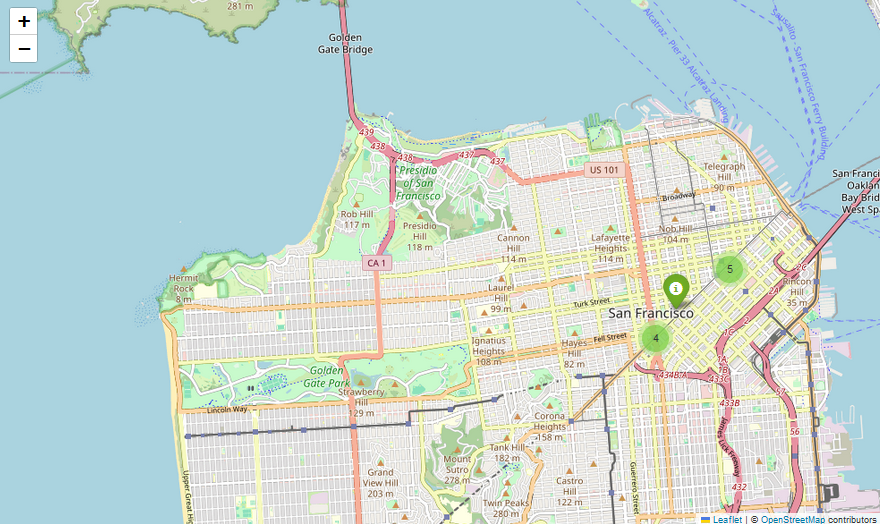

In [69]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "1.JPG")


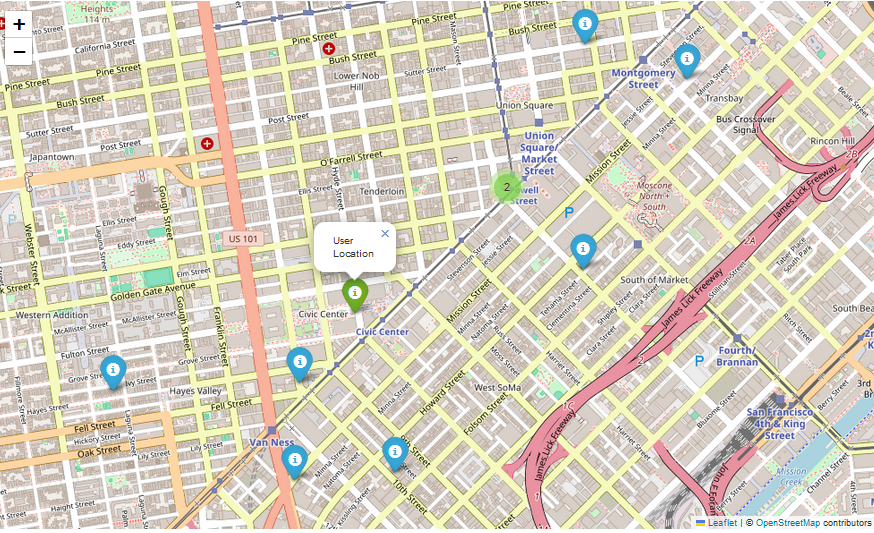

In [70]:

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "C:\\Users\\"
Image(filename = PATH + "2.JPG")


In [ ]:

# As you can see above, the 'generate_clusters' function uses KMeans to find cluster centers for the points of interest 
# (poi_coordinates). The generate_user_location function then selects one of these cluster centers for the user's 
# location. This should ensure that the user's location is closer to the middle of the points of interest. We can 
# adjust the center_deviation parameter to force the 'user_location' to converge to the center of the 'poi_coordinates'.


In [ ]:

# Here is another example of how we can do clustering, based on longitude and latitude coordinates.

# Spatial Clustering:
# Purpose: Identifying spatial patterns based on proximity.
# Algorithm Used: KMeans (in this example).

# Take-Away:
#  Spatial clustering groups data points that are close to each other in the feature space.
#  It partitions the data into clusters with similar spatial characteristics.
#  KMeans is effective when the number of clusters is known or can be estimated.


# Density-Based Clustering (DBSCAN):
# Purpose: Identifying clusters based on the density of data points.
# Algorithm Used: DBSCAN (in this example).

# Take-Away:
#  DBSCAN doesn't require specifying the number of clusters beforehand.
#  It forms clusters based on areas with higher point density, ignoring sparse regions.
#  It can identify outliers as noise points.
#  Particularly useful when clusters have varying shapes and densities.
        